**Disciplina:** Aprendizagem de Máquina **(EEC1509)**

**Grupo:** 

*   Beatriz Soares de Souza **(20211020152)**
*   Pedro Victor Andrade Alves **(20211027716)**

**Dataset:** [Road_Traffic_Accidents.csv](https://www.kaggle.com/datasets/saurabhshahane/road-traffic-accidents)

# **1 - Extract, Transform and Load (ETL)**


## **1.1 - Exploratory Data Analysis (EDA) and Fetch Data**

In [1]:
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 8.1 MB/s 
     |████████████████████████████████| 102 kB 12.9 MB/s 
     |████████████████████████████████| 303 kB 55.3 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 3.1 MB 48.1 MB/s 
     |████████████████████████████████| 596 kB 51.3 MB/s 
     |████████████████████████████████| 690 kB 52.0 MB/s 
     |████████████████████████████████| 812 kB 49.4 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=9b44502eca486749539cae1bb6c96e347e812dc6f9f195de12324e692d273987
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=a06c23f5ec93c7ddd6a2fd9d415a43917f51ee7d4dd5dde8e0eb3caf9087cd90
  Stored in directo

In [2]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 6.5 MB/s 
     |████████████████████████████████| 181 kB 7.1 MB/s 
     |████████████████████████████████| 153 kB 34.7 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=58a491b076c656159c0d8f0bd922e2c502649b2577fcf34d2a47729059f609e2
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [3]:
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import tempfile
import os

### **1.1.1 - Login wandb:**

In [4]:
# Login to Weights & Biases
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


###**1.1.2 - Create the raw_data artifact**

In [5]:
# importing the dataset
Accident_severity = pd.read_csv("raw_data.csv")
Accident_severity.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


In [6]:
# Send the raw_data.csv to the Wandb storing it as an artifact
!wandb artifact put \
      --name decision_tree1/raw_data.csv \
      --type raw_data \
      --description "The raw data about the severity of road traffic accidents" raw_data.csv

wandb: Uploading file raw_data.csv to: "pedro_victor046/decision_tree1/raw_data.csv:latest" (raw_data)
wandb: Currently logged in as: pedro_victor046. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.12.21
wandb: Run data is saved locally in /content/wandb/run-20220724_203407-2vph4txx
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run lively-planet-4
wandb: ⭐️ View project at https://wandb.ai/pedro_victor046/decision_tree1
wandb: 🚀 View run at https://wandb.ai/pedro_victor046/decision_tree1/runs/2vph4txx
Artifact uploaded, use this artifact in a run by adding:

    artifact = run.use_artifact("pedro_victor046/decision_tree1/raw_data.csv:v0")

wandb: Waiting for W&B process to finish... (success).
wandb:                                                                                
wandb: Synced lively-planet-4: https://wandb.ai/pedro_victor046/decision_tree1/runs/2vph4txx
wandb: Synced 5 W&B file(s), 0 media file(s), 0 artifact file

###**1.1.3 - Download raw_data artifact from Wandb:**

In [7]:
# save_code tracking all changes of the notebook and sync with Wandb
run = wandb.init(project="decision_tree1", save_code=True)

wandb: Currently logged in as: pedro_victor046. Use `wandb login --relogin` to force relogin


In [8]:
# donwload the latest version of artifact raw_data.csv
artifact = run.use_artifact("decision_tree1/raw_data.csv:latest")

In [9]:
# create a dataframe from the artifact
df = pd.read_csv(artifact.file())

In [10]:
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        12316 non-null  object
 3   Vehicle_driver_relation  12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Lanes_or_Medians         12316 non-null  object
 6   Types_of_Junction        12316 non-null  object
 7   Road_surface_type        12316 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12316 non-null  object
 11  Vehicle_movement         12316 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity        12316 non-nul

In [12]:
df.describe()

,Accident_severity
count,12316.000000
mean,1.832819
std,0.406082
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


###**1.1.4 - EDA using Pandas-Profiling**

In [13]:
ProfileReport(df, title="Pandas Profiling Report", explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **1.2 - Preprocessing**

### **1.2.1 - Login wandb:**

In [ ]:
# Login to Weights & Biases
!wandb login --relogin

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


### **1.2.2 - Artifacts:**

In [14]:
input_artifact="decision_tree1/raw_data.csv:latest"
artifact_name="preprocessed_data.csv"
artifact_type="clean_data"
artifact_description="Data after preprocessing"

### **1.2.3 - Setup your wandb project and clean the dataset**

In [15]:
# create a new job_type
run = wandb.init(project="decision_tree1", job_type="process_data")

In [16]:
# donwload the latest version of artifact raw_data.csv
artifact = run.use_artifact(input_artifact)

# create a dataframe from the artifact
df = pd.read_csv(artifact.file())

In [17]:
# Delete duplicated rows
df.drop_duplicates(inplace=True)

# Generate a "clean data file"
df.to_csv(artifact_name,index=False)

In [18]:
# Create a new artifact and configure with the necessary arguments
artifact = wandb.Artifact(name=artifact_name,
                          type=artifact_type,
                          description=artifact_description)
artifact.add_file(artifact_name)

<ManifestEntry digest: WlOyYerK3H9+FZZqDpRy/A==>

In [19]:
# Upload the artifact to Wandb
run.log_artifact(artifact)

In [20]:
# close the run
# waiting a while after run the previous cell before execute this
run.finish()

# **2 - Data Check**

In [ ]:
!pip install wandb

     |████████████████████████████████| 1.8 MB 5.0 MB/s 
     |████████████████████████████████| 145 kB 57.0 MB/s 
     |████████████████████████████████| 181 kB 57.8 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=c0e97f175d6ae0273023962113a5ad36b4c04d410ce7c3e56979d0588bfcd482
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [21]:
!pip install pytest pytest-sugar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import wandb

## **2.1 - Login wandb:**

In [ ]:
# Login to Weights & Biases
!wandb login --relogin

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## **2.2 - Pytest**

### **2.2.1 - Create and run a test file**

In [22]:
%%file test_data.py
import pytest
import wandb
import pandas as pd

# This is global so all tests are collected under the same run
run = wandb.init(project="decision_tree1", job_type="data_checks")

@pytest.fixture(scope="session")
def data():

    local_path = run.use_artifact("decision_tree1/preprocessed_data.csv:latest").file()
    df = pd.read_csv(local_path)

    return df

def test_data_length(data):
    """
    We test that we have enough data to continue
    """
    assert len(data) > 200

def test_number_of_columns(data):
    """
    We test that we have enough data to continue
    """
    assert data.shape[1] == 15

def test_column_presence_and_type(data):

    required_columns = {
        "Age_band_of_driver": pd.api.types.is_object_dtype,
        "Sex_of_driver": pd.api.types.is_object_dtype,
        "Educational_level": pd.api.types.is_object_dtype,
        "Vehicle_driver_relation": pd.api.types.is_object_dtype,
        "Driving_experience": pd.api.types.is_object_dtype,
        "Lanes_or_Medians": pd.api.types.is_object_dtype,
        "Types_of_Junction": pd.api.types.is_object_dtype,
        "Road_surface_type": pd.api.types.is_object_dtype,
        "Light_conditions": pd.api.types.is_object_dtype,
        "Weather_conditions": pd.api.types.is_object_dtype,
        "Type_of_collision": pd.api.types.is_object_dtype,
        "Vehicle_movement": pd.api.types.is_object_dtype,  
        "Pedestrian_movement": pd.api.types.is_object_dtype,
        "Cause_of_accident": pd.api.types.is_object_dtype,
        "Accident_severity": pd.api.types.is_int64_dtype
    }

    # Check column presence
    assert set(data.columns.values).issuperset(set(required_columns.keys()))

    for col_name, format_verification_funct in required_columns.items():

        assert format_verification_funct(data[col_name]), f"Column {col_name} failed test {format_verification_funct}"

def test_class_names(data):

    # Check that only the known classes are present
    known_classes = [
        2,
        1,
        0
    ]

    assert data["Accident_severity"].isin(known_classes).all()

Writing test_data.py


### **2.2.2 - Now lets run pytest**

In [23]:
!pytest . -vv

Test session starts (platform: linux, Python 3.7.13, pytest 3.6.4, pytest-sugar 0.9.5)
cachedir: .pytest_cache
rootdir: /content, inifile:
plugins: typeguard-2.7.1, sugar-0.9.5

 test_data.py::test_data_length ✓                                 25% ██▌       
 test_data.py::test_number_of_columns ✓                           50% █████     
 test_data.py::test_column_presence_and_type ✓                    75% ███████▌  
 test_data.py::test_class_names ✓                                100% ██████████

Results (4.38s):
       4 passed


In [24]:
# close the run
# waiting a while after run the previous cell before execute this
run.finish()

# **3 - Data Segregation**

## **3.1 - Install, load libraries and setup wandb**

In [ ]:
!pip install wandb

In [25]:
import logging
import tempfile
import pandas as pd
import os
import wandb
from sklearn.model_selection import train_test_split

### **3.1.1 - Login wandb:**

In [ ]:
# Login to Weights & Biases
!wandb login --relogin

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## **3.2 - Data Segragation Itself**

In [26]:
# global variables

# ratio used to split train and test data
test_size = 0.30

# seed used to reproduce purposes
seed = 39

# reference (column) to stratify the data
stratify = "Accident_severity"

# name of the input artifact
artifact_input_name = "decision_tree1/preprocessed_data.csv:latest"

# type of the artifact
artifact_type = "segregated_data"

In [27]:
# configure logging
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s %(message)s",
                    datefmt='%d-%m-%Y %H:%M:%S')

# reference for a logging obj
logger = logging.getLogger()

# initiate wandb project
run = wandb.init(project="decision_tree1", job_type="split_data")

logger.info("Downloading and reading artifact")
artifact = run.use_artifact(artifact_input_name)
artifact_path = artifact.file()
df = pd.read_csv(artifact_path)

# Split firstly in train/test, then we further divide the dataset to train and validation
logger.info("Splitting data into train and test")
splits = {}

splits["train"], splits["test"] = train_test_split(df,
                                                   test_size=test_size,
                                                   random_state=seed,
                                                   stratify=df[stratify])

# Save the artifacts. We use a temporary directory so we do not leave any trace behind
with tempfile.TemporaryDirectory() as tmp_dir:

    for split, df in splits.items():

        # Make the artifact name from the name of the split plus the provided root
        artifact_name = f"{split}.csv"

        # Get the path on disk within the temp directory
        temp_path = os.path.join(tmp_dir, artifact_name)

        logger.info(f"Uploading the {split} dataset to {artifact_name}")

        # Save then upload to W&B
        df.to_csv(temp_path,index=False)

        artifact = wandb.Artifact(name=artifact_name,
                                  type=artifact_type,
                                  description=f"{split} split of dataset {artifact_input_name}",
        )
        artifact.add_file(temp_path)

        logger.info("Logging artifact")
        run.log_artifact(artifact)

        # This waits for the artifact to be uploaded to W&B. If you
        # do not add this, the temp directory might be removed before
        # W&B had a chance to upload the datasets, and the upload
        # might fail
        artifact.wait()

24-07-2022 20:43:06 Downloading and reading artifact
24-07-2022 20:43:07 Splitting data into train and test
24-07-2022 20:43:07 Uploading the train dataset to train.csv
24-07-2022 20:43:07 Logging artifact
24-07-2022 20:43:09 Uploading the test dataset to test.csv
24-07-2022 20:43:09 Logging artifact


In [28]:
# close the run
# waiting a while after run the previous cell before execute this
run.finish()

# **4 - Train**

## **4.1 - Install, load libraries**

In [ ]:
!pip install wandb

In [29]:
import logging
import wandb
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import fbeta_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### **4.1.1 - Login wandb:**

In [ ]:
# Login to Weights & Biases
!wandb login --relogin

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## **4.2 - Holdout Configuration**

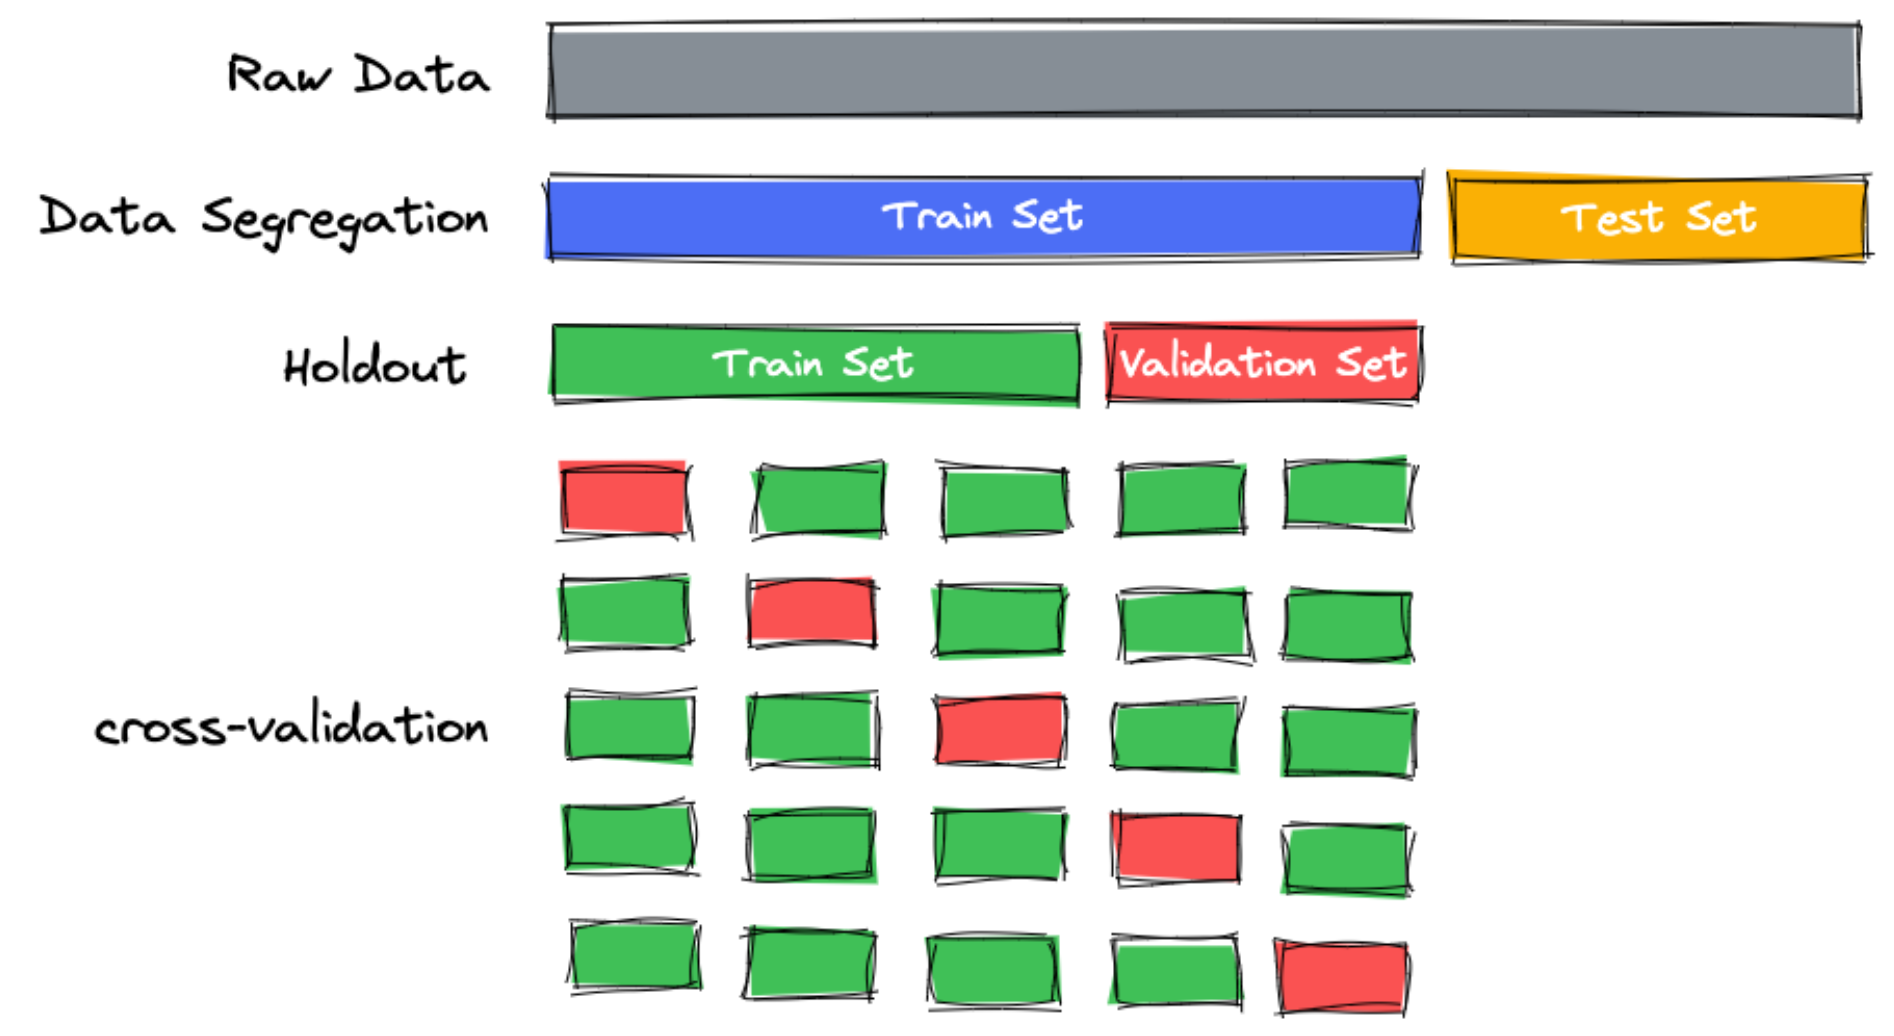

In [30]:
# global variables

# ratio used to split train and validation data
val_size = 0.30

# seed used to reproduce purposes
seed = 39

# reference (column) to stratify the data
stratify = "Accident_severity"

# name of the input artifact
artifact_input_name = "decision_tree1/train.csv:latest"

# type of the artifact
artifact_type = "Train"

In [31]:
# configure logging
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s %(message)s",
                    datefmt='%d-%m-%Y %H:%M:%S')

# reference for a logging obj
logger = logging.getLogger()

# initiate the wandb project
run = wandb.init(project="decision_tree1",job_type="train")

logger.info("Downloading and reading train artifact")
local_path = run.use_artifact(artifact_input_name).file()
df_train = pd.read_csv(local_path)

# Spliting train.csv into train and validation dataset
logger.info("Spliting data into train/val")
# split-out train/validation and test dataset
x_train, x_val, y_train, y_val = train_test_split(df_train.drop(labels=stratify,axis=1),
                                                  df_train[stratify],
                                                  test_size=val_size,
                                                  random_state=seed,
                                                  shuffle=True,
                                                  stratify=df_train[stratify])

24-07-2022 20:44:06 Downloading and reading train artifact
24-07-2022 20:44:06 Spliting data into train/val


In [32]:
logger.info("x train: {}".format(x_train.shape))
logger.info("y train: {}".format(y_train.shape))
logger.info("x val: {}".format(x_val.shape))
logger.info("y val: {}".format(y_val.shape))

24-07-2022 20:44:15 x train: (5843, 14)
24-07-2022 20:44:15 y train: (5843,)
24-07-2022 20:44:15 x val: (2505, 14)
24-07-2022 20:44:15 y val: (2505,)


## **4.3 - Data preparation**

### **4.3.2 - Encoding Target Variable**

In [33]:
y_train.head(10)

4234    2
6685    2
377     2
3012    2
5357    2
1530    2
4931    2
5469    2
2543    2
7964    2
Name: Accident_severity, dtype: int64

In [34]:
logger.info("Encoding Target Variable")
# define a categorical encoding for target variable
le = LabelEncoder()

# fit and transform y_train
y_train = le.fit_transform(y_train)

# transform y_test (avoiding data leakage)
y_val = le.transform(y_val)

logger.info("Classes [0, 1]: {}".format(le.inverse_transform([0, 1])))

24-07-2022 20:44:28 Encoding Target Variable
24-07-2022 20:44:28 Classes [0, 1]: [0 1]


In [35]:
y_train

array([2, 2, 2, ..., 2, 2, 2])

In [36]:
y_val

array([2, 2, 2, ..., 2, 2, 1])

### **4.3.4 - Using a full-pipeline**

#### **4.3.4.1 - Feature Extractor**

In [37]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    # Class Constructor
    def __init__(self, feature_names):
        self.feature_names = feature_names

    # Return self nothing else to do here
    def fit(self, X, y=None):
        return self

    # Method that describes what this custom transformer need to do
    def transform(self, X, y=None):
        return X[self.feature_names]

In [38]:
# for validation purposes
fs = FeatureSelector(x_train.select_dtypes("object").columns.to_list())
df = fs.fit_transform(x_train)
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident
4234,Over 51,Male,Junior high school,Employee,Below 1yr,One way,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Driving carelessly
6685,18-30,Male,Above high school,Employee,Above 10yr,Undivided Two way,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Rollover,Going straight,Not a Pedestrian,No distancing
377,31-50,Male,Junior high school,Employee,Above 10yr,Two-way (divided with broken lines road marking),Y Shape,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Turnover,Not a Pedestrian,No priority to vehicle
3012,18-30,Male,Unknown,Employee,5-10yr,Undivided Two way,Other,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Driving carelessly
5357,18-30,Male,Elementary school,Employee,1-2yr,Two-way (divided with broken lines road marking),Other,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Moving Backward,Not a Pedestrian,No distancing


In [39]:
# for validation purposes
fs = FeatureSelector(x_train.select_dtypes("int64").columns.to_list())
df = fs.fit_transform(x_train)
df.head()

""
4234
6685
377
3012
5357


#### **4.3.4.2 - Handling Categorical Features**

In [40]:
# Handling categorical features
class CategoricalTransformer(BaseEstimator, TransformerMixin):
    # Class constructor method that takes one boolean as its argument
    def __init__(self, new_features=True, colnames=None):
        self.new_features = new_features
        self.colnames = colnames

    # Return self nothing else to do here
    def fit(self, X, y=None):
        return self

    def get_feature_names_out(self):
        return self.colnames.tolist()

    # Transformer method we wrote for this transformer
    def transform(self, X, y=None):
        df = pd.DataFrame(X, columns=self.colnames)

        # Remove white space in categorical features
        df = df.apply(lambda row: row.str.strip())

        # customize feature?
        # How can I identify what needs to be modified? EDA!!!!
        if self.new_features:

            # minimize the cardinality of native_country feature
            # check cardinality using df.native_country.unique()
            df.loc[df['Educational_level'] == 'Junior high school','Educational_level'] = 'High school'
            df.loc[df['Educational_level'] == 'Writing & reading','Educational_level'] = 'Elementary school'
            df.loc[df['Educational_level'] == 'Illiterate','Educational_level'] = 'Illiterate'

            df.loc[df['Driving_experience'] == 'Below 1yr','Driving_experience'] = 'Below 1yr-2yr'
            df.loc[df['Driving_experience'] == '1-2yr','Driving_experience'] = 'Below 1yr-2yr'

            df.loc[df['Weather_conditions'] == 'Fog or mist','Weather_conditions'] = 'Fog or mist'

        # update column names
        self.colnames = df.columns

        return df

In [41]:
# for validation purposes
fs = FeatureSelector(x_train.select_dtypes("object").columns.to_list())
df = fs.fit_transform(x_train)
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident
4234,Over 51,Male,Junior high school,Employee,Below 1yr,One way,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Driving carelessly
6685,18-30,Male,Above high school,Employee,Above 10yr,Undivided Two way,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Rollover,Going straight,Not a Pedestrian,No distancing
377,31-50,Male,Junior high school,Employee,Above 10yr,Two-way (divided with broken lines road marking),Y Shape,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Turnover,Not a Pedestrian,No priority to vehicle
3012,18-30,Male,Unknown,Employee,5-10yr,Undivided Two way,Other,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Driving carelessly
5357,18-30,Male,Elementary school,Employee,1-2yr,Two-way (divided with broken lines road marking),Other,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Moving Backward,Not a Pedestrian,No distancing


In [42]:
# for validation purposes
ct = CategoricalTransformer(new_features=True,colnames=df.columns.tolist())
df_cat = ct.fit_transform(df)
df_cat.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident
4234,Over 51,Male,High school,Employee,Below 1yr-2yr,One way,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Driving carelessly
6685,18-30,Male,Above high school,Employee,Above 10yr,Undivided Two way,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Rollover,Going straight,Not a Pedestrian,No distancing
377,31-50,Male,High school,Employee,Above 10yr,Two-way (divided with broken lines road marking),Y Shape,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Turnover,Not a Pedestrian,No priority to vehicle
3012,18-30,Male,Unknown,Employee,5-10yr,Undivided Two way,Other,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Driving carelessly
5357,18-30,Male,Elementary school,Employee,Below 1yr-2yr,Two-way (divided with broken lines road marking),Other,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Moving Backward,Not a Pedestrian,No distancing


In [43]:
# check the cardinality before and after transformation
x_train.select_dtypes("object").apply(pd.Series.nunique)

Age_band_of_driver          5
Sex_of_driver               3
Educational_level           7
Vehicle_driver_relation     4
Driving_experience          8
Lanes_or_Medians            7
Types_of_Junction           8
Road_surface_type           6
Light_conditions            4
Weather_conditions          9
Type_of_collision          10
Vehicle_movement           13
Pedestrian_movement         9
Cause_of_accident          20
dtype: int64

In [44]:
# check the cardinality before and after transformation
df_cat.apply(pd.Series.nunique)

Age_band_of_driver          5
Sex_of_driver               3
Educational_level           5
Vehicle_driver_relation     4
Driving_experience          7
Lanes_or_Medians            7
Types_of_Junction           8
Road_surface_type           6
Light_conditions            4
Weather_conditions          9
Type_of_collision          10
Vehicle_movement           13
Pedestrian_movement         9
Cause_of_accident          20
dtype: int64

#### **4.3.4.3 - Data Preparation Pipeline**

In [45]:
# Categrical features to pass down the categorical pipeline
categorical_features = x_train.select_dtypes("object").columns.to_list()

# Defining the steps for the categorical pipeline
categorical_pipeline = Pipeline(steps=[('cat_selector', FeatureSelector(categorical_features)),
                                       ('imputer_cat', SimpleImputer(strategy="most_frequent")),
                                       ('cat_transformer', CategoricalTransformer(colnames=categorical_features)),
                                       #('cat_encoder','passthrough'
                                       ('cat_encoder', OneHotEncoder(sparse=False, drop="first"))
                                       ]
                                )

# Combine numerical and categorical pieplines into one full big pipeline horizontally
full_pipeline_preprocessing = FeatureUnion(transformer_list=[('cat_pipeline', categorical_pipeline)])

In [46]:
# for validation purposes
new_data = full_pipeline_preprocessing.fit_transform(x_train)
# cat_names is a numpy array
cat_names = full_pipeline_preprocessing.get_params()["cat_pipeline"][3].get_feature_names_out().tolist()
# num_names is a list
df = pd.DataFrame(new_data,columns = cat_names)
df.head()

,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Sex_of_driver_Male,Sex_of_driver_Unknown,Educational_level_Elementary school,Educational_level_High school,Educational_level_Illiterate,Educational_level_Unknown,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **4.4 - Holdout Training**

In [47]:
# The full pipeline 
pipe = Pipeline(steps = [('full_pipeline', full_pipeline_preprocessing),
                         ("classifier", DecisionTreeClassifier())
                         ]
                )

# training
logger.info("Training")
pipe.fit(x_train, y_train)

# predict
logger.info("Infering")
predict = pipe.predict(x_val)

# Evaluation Metrics
logger.info("Evaluation metrics")
#fbeta = fbeta_score(y_val, predict, beta=1, zero_division=1)
#precision = precision_score(y_val, predict, zero_division=1)
#recall = recall_score(y_val, predict, zero_division=1)
acc = accuracy_score(y_val, predict)

logger.info("Accuracy: {}".format(acc))
#logger.info("Precision: {}".format(precision))
#logger.info("Recall: {}".format(recall))
#logger.info("F1: {}".format(fbeta))

#talk about numeric variables


24-07-2022 20:46:12 Training
24-07-2022 20:46:13 Infering
24-07-2022 20:46:13 Evaluation metrics
24-07-2022 20:46:13 Accuracy: 0.7049900199600798


In [48]:
run.summary["Acc"] = acc
#run.summary["Precision"] = precision
#run.summary["Recall"] = recall
#run.summary["F1"] = fbeta

In [49]:
# predict bias
logger.info("Infering Bias")
predict_bias = pipe.predict(x_train)

# Evaluation Metrics
logger.info("Bias Evaluation metrics")
#fbeta = fbeta_score(y_train, predict_bias, beta=1, zero_division=1)
#precision = precision_score(y_train, predict_bias, zero_division=1)
#recall = recall_score(y_train, predict_bias, zero_division=1)
acc = accuracy_score(y_train, predict_bias)

logger.info("Bias Accuracy: {}".format(acc))
#logger.info("Bias Precision: {}".format(precision))
#logger.info("Bias Recall: {}".format(recall))
#logger.info("Bias F1: {}".format(fbeta))

24-07-2022 20:46:26 Infering Bias
24-07-2022 20:46:26 Bias Evaluation metrics
24-07-2022 20:46:26 Bias Accuracy: 0.9929830566489817


In [50]:
# Compare the accuracy, precision, recall with previous ones
print(classification_report(y_val,predict))

              precision    recall  f1-score   support

           0       0.07      0.06      0.06        33
           1       0.13      0.16      0.15       365
           2       0.84      0.81      0.82      2107

    accuracy                           0.70      2505
   macro avg       0.35      0.34      0.35      2505
weighted avg       0.73      0.70      0.72      2505



In [51]:
fig_confusion_matrix, ax = plt.subplots(1,1,figsize=(7,4))
ConfusionMatrixDisplay(confusion_matrix(predict,y_val,labels=[1,0]),
                       display_labels=["0","1","2"]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

In [52]:
# Uploading figures
logger.info("Uploading figures")
run.log(
    {
        "confusion_matrix": wandb.Image(fig_confusion_matrix),
        # "other_figure": wandb.Image(other_fig)
    }
)

24-07-2022 20:46:45 Uploading figures


In [53]:
# Feature importance
pipe.get_params()["classifier"].feature_importances_

array([0.04264136, 0.02763712, 0.00204966, 0.00167054, 0.00770708,
       0.00126605, 0.0249203 , 0.02555556, 0.00221729, 0.00942037,
       0.0016275 , 0.0329109 , 0.00949767, 0.03033374, 0.03278429,
       0.03050615, 0.00183969, 0.01481894, 0.00083108, 0.00533   ,
       0.02330035, 0.00476075, 0.03754365, 0.01377857, 0.02304388,
       0.00917683, 0.00909097, 0.00762559, 0.00075108, 0.01500276,
       0.00043188, 0.01344699, 0.00450583, 0.01135516, 0.00207467,
       0.00810618, 0.00409744, 0.00232954, 0.00759182, 0.03216869,
       0.        , 0.0116025 , 0.00504561, 0.01311338, 0.00064782,
       0.00254834, 0.00333095, 0.00238809, 0.01885929, 0.02294868,
       0.0033906 , 0.00045663, 0.00108674, 0.01093119, 0.00387638,
       0.03097332, 0.        , 0.00869969, 0.01900628, 0.00865115,
       0.01342349, 0.00300748, 0.00115869, 0.01474565, 0.00366648,
       0.01066256, 0.00168517, 0.00711131, 0.0010006 , 0.0070102 ,
       0.00189403, 0.00084659, 0.        , 0.01232357, 0.00207

In [54]:
# Get categorical column names
cat_names = pipe.named_steps['full_pipeline'].get_params()["cat_pipeline"][3].get_feature_names_out().tolist()
cat_names

['Age_band_of_driver_31-50',
 'Age_band_of_driver_Over 51',
 'Age_band_of_driver_Under 18',
 'Age_band_of_driver_Unknown',
 'Sex_of_driver_Male',
 'Sex_of_driver_Unknown',
 'Educational_level_Elementary school',
 'Educational_level_High school',
 'Educational_level_Illiterate',
 'Educational_level_Unknown',
 'Vehicle_driver_relation_Other',
 'Vehicle_driver_relation_Owner',
 'Vehicle_driver_relation_Unknown',
 'Driving_experience_5-10yr',
 'Driving_experience_Above 10yr',
 'Driving_experience_Below 1yr-2yr',
 'Driving_experience_No Licence',
 'Driving_experience_Unknown',
 'Driving_experience_unknown',
 'Lanes_or_Medians_One way',
 'Lanes_or_Medians_Two-way (divided with broken lines road marking)',
 'Lanes_or_Medians_Two-way (divided with solid lines road marking)',
 'Lanes_or_Medians_Undivided Two way',
 'Lanes_or_Medians_Unknown',
 'Lanes_or_Medians_other',
 'Types_of_Junction_No junction',
 'Types_of_Junction_O Shape',
 'Types_of_Junction_Other',
 'Types_of_Junction_T Shape',
 'Typ

In [55]:
# merge all column names together
all_names = cat_names 
all_names

['Age_band_of_driver_31-50',
 'Age_band_of_driver_Over 51',
 'Age_band_of_driver_Under 18',
 'Age_band_of_driver_Unknown',
 'Sex_of_driver_Male',
 'Sex_of_driver_Unknown',
 'Educational_level_Elementary school',
 'Educational_level_High school',
 'Educational_level_Illiterate',
 'Educational_level_Unknown',
 'Vehicle_driver_relation_Other',
 'Vehicle_driver_relation_Owner',
 'Vehicle_driver_relation_Unknown',
 'Driving_experience_5-10yr',
 'Driving_experience_Above 10yr',
 'Driving_experience_Below 1yr-2yr',
 'Driving_experience_No Licence',
 'Driving_experience_Unknown',
 'Driving_experience_unknown',
 'Lanes_or_Medians_One way',
 'Lanes_or_Medians_Two-way (divided with broken lines road marking)',
 'Lanes_or_Medians_Two-way (divided with solid lines road marking)',
 'Lanes_or_Medians_Undivided Two way',
 'Lanes_or_Medians_Unknown',
 'Lanes_or_Medians_other',
 'Types_of_Junction_No junction',
 'Types_of_Junction_O Shape',
 'Types_of_Junction_Other',
 'Types_of_Junction_T Shape',
 'Typ

In [56]:
# Visualize all classifier plots
# For a complete documentation please see: https://docs.wandb.ai/guides/integrations/scikit
wandb.sklearn.plot_classifier(pipe.get_params()["classifier"],
                              full_pipeline_preprocessing.transform(x_train),
                              full_pipeline_preprocessing.transform(x_val),
                              y_train,
                              y_val,
                              predict,
                              pipe.predict_proba(x_val),
                              [0,1,2],
                              model_name='DT', feature_names=all_names)

wandb: 
wandb: Plotting DT.
wandb: Logged feature importances.
wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: WARNING This function only supports binary classification at the moment and therefore expects labels to be binary. Skipping calibration curve.
wandb: Logged calibration curve.
wandb: WARNING wandb.plots.* functions are deprecated and will be removed in a future release. Please use wandb.plot.* instead.
wandb: Logged roc curve.
wandb: Logged precision-recall curve.


In [57]:
# close the current run before to execute the next section
run.finish()

Acc,0.70499


## **4.5 - Hyperparameter Tuning**

In [ ]:
# To see all parameters of a specific step of the pipeline
# pipe.named_steps['classifier'].get_params() #or
# pipe.named_steps['full_pipeline'].get_params()

In [58]:
# global seed
seed = 39

In [59]:
sweep_config = {
    # try grid or random
    "method": "random",
    "metric": {
        "name": "Accuracy",
        "goal": "maximize"
        },
    "parameters": {
        "criterion": {
            "values": ["gini","entropy"]
            },
        "splitter": {
            "values": ["random","best"]
        },
        "model": {
            "values": [0,1,2]
        },
        "random_state": {
            "values": [seed]
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="decision_tree1")

Create sweep with ID: f87cn7ql
Sweep URL: https://wandb.ai/pedro_victor046/decision_tree1/sweeps/f87cn7ql


In [63]:
def train():
    with wandb.init() as run:

        # The full pipeline 
        pipe = Pipeline(steps = [('full_pipeline', full_pipeline_preprocessing),
                                    ("classifier",DecisionTreeClassifier())
                                    ]
                        )

        # update the parameters of the pipeline that we would like to tuning
        #pipe.set_params(**{"full_pipeline__num_pipeline__num_transformer__model": run.config.model})
        pipe.set_params(**{"classifier__criterion": run.config.criterion})
        pipe.set_params(**{"classifier__splitter": run.config.splitter})
        pipe.set_params(**{"classifier__random_state": run.config.random_state})

        # training
        logger.info("Training")
        pipe.fit(x_train, y_train)

        # predict
        logger.info("Infering")
        predict = pipe.predict(x_val)

        # Evaluation Metrics
        logger.info("Evaluation metrics")
        #fbeta = fbeta_score(y_val, predict, beta=1, zero_division=1)
        #precision = precision_score(y_val, predict, zero_division=1)
        #recall = recall_score(y_val, predict, zero_division=1)
        acc = accuracy_score(y_val, predict)

        logger.info("Accuracy: {}".format(acc))
        #logger.info("Precision: {}".format(precision))
        #logger.info("Recall: {}".format(recall))
        #logger.info("F1: {}".format(fbeta))

        run.summary["Accuracy"] = acc
        #run.summary["Precision"] = precision
        #run.summary["Recall"] = recall
        #run.summary["F1"] = fbeta


In [64]:
wandb.agent(sweep_id, function = train, count=8)

wandb: Agent Starting Run: zbtq2urd with config:
wandb: 	criterion: entropy
wandb: 	model: 2
wandb: 	random_state: 39
wandb: 	splitter: random


24-07-2022 20:53:39 Training
24-07-2022 20:53:39 Infering
24-07-2022 20:53:39 Evaluation metrics
24-07-2022 20:53:39 Accuracy: 0.7217564870259481


Accuracy,0.72176


wandb: Agent Starting Run: jn2j1d6l with config:
wandb: 	criterion: entropy
wandb: 	model: 0
wandb: 	random_state: 39
wandb: 	splitter: best


24-07-2022 20:53:54 Training
24-07-2022 20:53:54 Infering
24-07-2022 20:53:55 Evaluation metrics
24-07-2022 20:53:55 Accuracy: 0.7189620758483034


Accuracy,0.71896


wandb: Agent Starting Run: ixwyzu1i with config:
wandb: 	criterion: entropy
wandb: 	model: 1
wandb: 	random_state: 39
wandb: 	splitter: best


24-07-2022 20:54:09 Training
24-07-2022 20:54:10 Infering
24-07-2022 20:54:10 Evaluation metrics
24-07-2022 20:54:10 Accuracy: 0.7189620758483034


Accuracy,0.71896


wandb: Agent Starting Run: dg271ftf with config:
wandb: 	criterion: entropy
wandb: 	model: 0
wandb: 	random_state: 39
wandb: 	splitter: random


24-07-2022 20:54:25 Training
24-07-2022 20:54:25 Infering
24-07-2022 20:54:25 Evaluation metrics
24-07-2022 20:54:25 Accuracy: 0.7217564870259481


Accuracy,0.72176


wandb: Agent Starting Run: o9pa7l55 with config:
wandb: 	criterion: gini
wandb: 	model: 1
wandb: 	random_state: 39
wandb: 	splitter: best


24-07-2022 20:54:40 Training
24-07-2022 20:54:40 Infering
24-07-2022 20:54:40 Evaluation metrics
24-07-2022 20:54:40 Accuracy: 0.7065868263473054


Accuracy,0.70659


wandb: Agent Starting Run: hqgvm3cx with config:
wandb: 	criterion: entropy
wandb: 	model: 2
wandb: 	random_state: 39
wandb: 	splitter: best


24-07-2022 20:54:56 Training
24-07-2022 20:54:56 Infering
24-07-2022 20:54:56 Evaluation metrics
24-07-2022 20:54:56 Accuracy: 0.7189620758483034


Accuracy,0.71896


wandb: Agent Starting Run: i6ddjn7b with config:
wandb: 	criterion: gini
wandb: 	model: 0
wandb: 	random_state: 39
wandb: 	splitter: random


24-07-2022 20:55:11 Training
24-07-2022 20:55:11 Infering
24-07-2022 20:55:11 Evaluation metrics
24-07-2022 20:55:11 Accuracy: 0.7025948103792415


Accuracy,0.70259


wandb: Agent Starting Run: rke3fsjo with config:
wandb: 	criterion: entropy
wandb: 	model: 2
wandb: 	random_state: 39
wandb: 	splitter: best


24-07-2022 20:55:32 Training
24-07-2022 20:55:32 Infering
24-07-2022 20:55:32 Evaluation metrics
24-07-2022 20:55:32 Accuracy: 0.7189620758483034


Accuracy,0.71896


## **4.6 - Configure and train the best model**

In [ ]:
# Note that a new run is yet synced to last sweep run
# Just to check
run = wandb.init()

In [ ]:
# initiate the wandb project
# run = wandb.init(project="decision_tree",job_type="train")

In [ ]:
# The full pipeline 
pipe = Pipeline(steps = [('full_pipeline', full_pipeline_preprocessing),
                         ("classifier",DecisionTreeClassifier())
                         ]
                )

# update the parameters of the pipeline that we would like to tuning
#pipe.set_params(**{"full_pipeline__num_pipeline__num_transformer__model": 2})
pipe.set_params(**{"classifier__criterion": 'entropy'})
pipe.set_params(**{"classifier__splitter": 'best'})
pipe.set_params(**{"classifier__random_state": 41})

# training
logger.info("Training")
pipe.fit(x_train, y_train)

# predict
logger.info("Infering")
predict = pipe.predict(x_val)

# Evaluation Metrics
logger.info("Evaluation metrics")
#fbeta = fbeta_score(y_val, predict, beta=1, zero_division=1)
#precision = precision_score(y_val, predict, zero_division=1)
#recall = recall_score(y_val, predict, zero_division=1)
acc = accuracy_score(y_val, predict)

logger.info("Accuracy: {}".format(acc))
#logger.info("Precision: {}".format(precision))
#logger.info("Recall: {}".format(recall))
#logger.info("F1: {}".format(fbeta))

run.summary["Acc"] = acc
#run.summary["Precision"] = precision
#run.summary["Recall"] = recall
#run.summary["F1"] = fbeta

26-05-2022 14:19:09 Training
26-05-2022 14:19:09 Infering
26-05-2022 14:19:09 Evaluation metrics
26-05-2022 14:19:09 Accuracy: 0.706187624750499


In [ ]:
# Get categorical column names
cat_names = pipe.named_steps['full_pipeline'].get_params()["cat_pipeline"][3].get_feature_names_out().tolist()
cat_names

['Age_band_of_driver_31-50',
 'Age_band_of_driver_Over 51',
 'Age_band_of_driver_Under 18',
 'Age_band_of_driver_Unknown',
 'Sex_of_driver_Male',
 'Sex_of_driver_Unknown',
 'Educational_level_Elementary school',
 'Educational_level_High school',
 'Educational_level_Illiterate',
 'Educational_level_Unknown',
 'Vehicle_driver_relation_Other',
 'Vehicle_driver_relation_Owner',
 'Vehicle_driver_relation_Unknown',
 'Driving_experience_5-10yr',
 'Driving_experience_Above 10yr',
 'Driving_experience_Below 1yr-2yr',
 'Driving_experience_No Licence',
 'Driving_experience_Unknown',
 'Driving_experience_unknown',
 'Lanes_or_Medians_One way',
 'Lanes_or_Medians_Two-way (divided with broken lines road marking)',
 'Lanes_or_Medians_Two-way (divided with solid lines road marking)',
 'Lanes_or_Medians_Undivided Two way',
 'Lanes_or_Medians_Unknown',
 'Lanes_or_Medians_other',
 'Types_of_Junction_No junction',
 'Types_of_Junction_O Shape',
 'Types_of_Junction_Other',
 'Types_of_Junction_T Shape',
 'Typ

In [ ]:
# Get numerical column names
#num_names = pipe.named_steps['full_pipeline'].get_params()["num_pipeline"][2].get_feature_names_out()
#num_names

In [ ]:
# merge all column names together
all_names = cat_names 
all_names

['Age_band_of_driver_31-50',
 'Age_band_of_driver_Over 51',
 'Age_band_of_driver_Under 18',
 'Age_band_of_driver_Unknown',
 'Sex_of_driver_Male',
 'Sex_of_driver_Unknown',
 'Educational_level_Elementary school',
 'Educational_level_High school',
 'Educational_level_Illiterate',
 'Educational_level_Unknown',
 'Vehicle_driver_relation_Other',
 'Vehicle_driver_relation_Owner',
 'Vehicle_driver_relation_Unknown',
 'Driving_experience_5-10yr',
 'Driving_experience_Above 10yr',
 'Driving_experience_Below 1yr-2yr',
 'Driving_experience_No Licence',
 'Driving_experience_Unknown',
 'Driving_experience_unknown',
 'Lanes_or_Medians_One way',
 'Lanes_or_Medians_Two-way (divided with broken lines road marking)',
 'Lanes_or_Medians_Two-way (divided with solid lines road marking)',
 'Lanes_or_Medians_Undivided Two way',
 'Lanes_or_Medians_Unknown',
 'Lanes_or_Medians_other',
 'Types_of_Junction_No junction',
 'Types_of_Junction_O Shape',
 'Types_of_Junction_Other',
 'Types_of_Junction_T Shape',
 'Typ

In [ ]:
# Visualize all classifier plots
# For a complete documentation please see: https://docs.wandb.ai/guides/integrations/scikit
wandb.sklearn.plot_classifier(pipe.get_params()["classifier"],
                              full_pipeline_preprocessing.transform(x_train),
                              full_pipeline_preprocessing.transform(x_val),
                              y_train,
                              y_val,
                              predict,
                              pipe.predict_proba(x_val),
                              [0,1,2],
                              model_name='BestModel', feature_names=all_names)

wandb: 
wandb: Plotting BestModel.
wandb: Logged feature importances.
wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: WARNING This function only supports binary classification at the moment and therefore expects labels to be binary. Skipping calibration curve.
wandb: Logged calibration curve.
wandb: Logged roc curve.
wandb: Logged precision-recall curve.


## **4.7 - Export the best model**

In [ ]:
# types and names of the artifacts
artifact_type = "inference_artifact"
artifact_encoder = "target_encoder"
artifact_model = "model_export"

In [ ]:
logger.info("Dumping the artifacts to disk")
# Save the model using joblib
joblib.dump(pipe, artifact_model)

# Save the target encoder using joblib
joblib.dump(le, artifact_encoder)

26-05-2022 14:19:33 Dumping the artifacts to disk


['target_encoder']

In [ ]:
# Model artifact
artifact = wandb.Artifact(artifact_model,
                          type=artifact_type,
                          description="A full pipeline composed of a Preprocessing Stage and a Decision Tree model"
                          )

logger.info("Logging model artifact")
artifact.add_file(artifact_model)
run.log_artifact(artifact)

26-05-2022 14:19:44 Logging model artifact


In [ ]:
# Target encoder artifact
artifact = wandb.Artifact(artifact_encoder,
                          type=artifact_type,
                          description="The encoder used to encode the target variable"
                          )

logger.info("Logging target enconder artifact")
artifact.add_file(artifact_encoder)
run.log_artifact(artifact)

26-05-2022 14:19:50 Logging target enconder artifact


In [ ]:
run.finish()

Acc,0.70619


# **5 - Test**

## **5.1 - Install, load libraries**

In [ ]:
!pip install wandb

In [ ]:
import logging
import pandas as pd
import wandb
import joblib
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import fbeta_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Login to Weights & Biases
!wandb login --relogin

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## **5.2 - Test evaluation**

### **5.2.1 - Definition of the base classes**

In [ ]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    # Class Constructor
    def __init__(self, feature_names):
        self.feature_names = feature_names

    # Return self nothing else to do here
    def fit(self, X, y=None):
        return self

    # Method that describes what this custom transformer need to do
    def transform(self, X, y=None):
        return X[self.feature_names]

# Handling categorical features
class CategoricalTransformer(BaseEstimator, TransformerMixin):
    # Class constructor method that takes one boolean as its argument
    def __init__(self, new_features=True, colnames=None):
        self.new_features = new_features
        self.colnames = colnames

    # Return self nothing else to do here
    def fit(self, X, y=None):
        return self

    def get_feature_names_out(self):
        return self.colnames.tolist()

    # Transformer method we wrote for this transformer
    def transform(self, X, y=None):
        df = pd.DataFrame(X, columns=self.colnames)

        # Remove white space in categorical features
        df = df.apply(lambda row: row.str.strip())

        # customize feature?
        # How can I identify what needs to be modified? EDA!!!!
        if self.new_features:

            # minimize the cardinality of native_country feature
            # check cardinality using df.native_country.unique()
            df.loc[df['Educational_level'] == 'Junior high school','Educational_level'] = 'High school'
            df.loc[df['Educational_level'] == 'Writing & reading','Educational_level'] = 'Elementary school'
            df.loc[df['Educational_level'] == 'Illiterate','Educational_level'] = 'Illiterate'

            df.loc[df['Driving_experience'] == 'Below 1yr','Driving_experience'] = 'Below 1yr-2yr'
            df.loc[df['Driving_experience'] == '1-2yr','Driving_experience'] = 'Below 1yr-2yr'

            df.loc[df['Weather_conditions'] == 'Fog or mist','Weather_conditions'] = 'Fog or mist'

        # update column names
        self.colnames = df.columns

        return df

### **5.2.2 - Evaluation**

In [ ]:
# global variables

# name of the artifact related to test dataset
artifact_test_name = "decision_tree1/test.csv:latest"

# name of the model artifact
artifact_model_name = "decision_tree1/model_export:latest"

# name of the target encoder artifact
artifact_encoder_name = "decision_tree1/target_encoder:latest"

In [ ]:
# configure logging
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s %(message)s",
                    datefmt='%d-%m-%Y %H:%M:%S')

# reference for a logging obj
logger = logging.getLogger()

In [ ]:
# initiate the wandb project
run = wandb.init(project="decision_tree1",job_type="test")

wandb: WARNING Ignored wandb.init() arg project when running a sweep.


In [ ]:
logger.info("Downloading and reading test artifact")
test_data_path = run.use_artifact(artifact_test_name).file()
df_test = pd.read_csv(test_data_path)

# Extract the target from the features
logger.info("Extracting target from dataframe")
x_test = df_test.copy()
y_test = x_test.pop("Accident_severity")

26-05-2022 14:20:51 Downloading and reading test artifact
26-05-2022 14:20:52 Extracting target from dataframe


In [ ]:
# Takes a look at test set
x_test.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident
0,Over 51,Male,Unknown,Unknown,Unknown,Two-way (divided with broken lines road marking),Crossing,Asphalt roads,Darkness - lights lit,Normal,Collision with roadside objects,Turnover,Not a Pedestrian,Overloading
1,Under 18,Male,Unknown,Unknown,Unknown,One way,Y Shape,Asphalt roads,Daylight,Raining,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the left
2,18-30,Male,Elementary school,Employee,5-10yr,One way,Y Shape,Asphalt roads,Darkness - lights lit,Unknown,Vehicle with vehicle collision,Reversing,Not a Pedestrian,No distancing
3,Under 18,Male,Junior high school,Employee,2-5yr,other,Crossing,Asphalt roads,Daylight,Raining,Vehicle with vehicle collision,Moving Backward,Not a Pedestrian,Other
4,Unknown,Female,Junior high school,Employee,2-5yr,Undivided Two way,Y Shape,Asphalt roads,Darkness - lights lit,Unknown,Vehicle with vehicle collision,Going straight,"Walking along in carriageway, back to traffic",Changing lane to the left


In [ ]:
# Take a look at the target variable
y_test.head()

0    2
1    2
2    2
3    2
4    2
Name: Accident_severity, dtype: int64

In [ ]:
# Extract the encoding of the target variable
logger.info("Extracting the encoding of the target variable")
encoder_export_path = run.use_artifact(artifact_encoder_name).file()
le = joblib.load(encoder_export_path)

26-05-2022 14:21:05 Extracting the encoding of the target variable


In [ ]:
# transform y_train
y_test = le.transform(y_test)
logger.info("Classes [0, 1]: {}".format(le.inverse_transform([0, 1])))

26-05-2022 14:21:08 Classes [0, 1]: [0 1]


In [ ]:
# target variable after the encoding
y_test

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
# Download inference artifact
logger.info("Downloading and load the exported model")
model_export_path = run.use_artifact(artifact_model_name).file()
pipe = joblib.load(model_export_path)

26-05-2022 14:21:17 Downloading and load the exported model


In [ ]:
# predict
logger.info("Infering")
predict = pipe.predict(x_test)

# Evaluation Metrics
logger.info("Test Evaluation metrics")
#fbeta = fbeta_score(y_test, predict, beta=1, zero_division=1)
#precision = precision_score(y_test, predict, zero_division=1)
#recall = recall_score(y_test, predict, zero_division=1)
acc = accuracy_score(y_test, predict)

logger.info("Test Accuracy: {}".format(acc))
#logger.info("Test Precision: {}".format(precision))
#logger.info("Test Recall: {}".format(recall))
#logger.info("Test F1: {}".format(fbeta))

run.summary["Acc"] = acc
#run.summary["Precision"] = precision
#run.summary["Recall"] = recall
#run.summary["F1"] = fbeta

26-05-2022 14:21:21 Infering
26-05-2022 14:21:21 Test Evaluation metrics
26-05-2022 14:21:21 Test Accuracy: 0.7146450531022918


In [ ]:
# Compare the accuracy, precision, recall with previous ones
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.02      0.02      0.02        47
           1       0.14      0.16      0.15       521
           2       0.84      0.82      0.83      3010

    accuracy                           0.71      3578
   macro avg       0.33      0.33      0.33      3578
weighted avg       0.73      0.71      0.72      3578



In [ ]:
fig_confusion_matrix, ax = plt.subplots(1,1,figsize=(7,4))
ConfusionMatrixDisplay(confusion_matrix(predict,y_test,labels=[1,0]),
                       display_labels=["0","1","2"]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

In [ ]:
# Uploading figures
logger.info("Uploading figures")
run.log(
    {
        "confusion_matrix": wandb.Image(fig_confusion_matrix),
        # "other_figure": wandb.Image(other_fig)
    }
)

26-05-2022 14:21:37 Uploading figures


In [ ]:
run.finish()

Acc,0.71465
